In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset and clean dataset
df = pd.read_csv('parkinsons data.csv')
df = df.drop(['name'], axis = 1)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
#Describe dataset
print("----------------------------------------------------------------")
print("Description of data:\n",df.describe())
print("----------------------------------------------------------------")
print("Size of data:", df.size)
print("----------------------------------------------------------------")
print("Data Information:\n",df.info)
print("----------------------------------------------------------------")

----------------------------------------------------------------
Description of data:
        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min       

In [4]:
#extracting features and targets
feature = df.drop(['status'], axis = 1)
target = df['status']

In [5]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)

In [6]:
#standard scaling and encoding
scaler = StandardScaler()
encoder = LabelEncoder()
X_train = scaler.fit_transform(X_train)
y_train = encoder.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = encoder.fit_transform(y_test)

In [32]:
#Randomforest model
model = RandomForestClassifier(
    bootstrap=True,
    random_state=42)

In [8]:
#fit model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
#prediction
predict = model.predict(X_test)

In [10]:
#Evaluations
print("----------------------------------------------------------------")
accuracy = accuracy_score(y_test, predict)
print(f"Accuracy of the model is: {accuracy*100:.2f}%")

print("----------------------------------------------------------------")
precision = precision_score(y_test, predict)
print(f"Precision of the model is: {precision*100:.2f}%")

print("----------------------------------------------------------------")
f1 = f1_score(y_test, predict)
print(f"F1 Score of the model is: {f1*100:.2f}%")

print("----------------------------------------------------------------")
recall = recall_score(y_test, predict)
print(f"Recall of the model is: {recall*100:.2f}%")
print("----------------------------------------------------------------")

cr = classification_report(y_test, predict)
print("Classification report of the model is:\n", cr)
print("----------------------------------------------------------------")


----------------------------------------------------------------
Accuracy of the model is: 89.74%
----------------------------------------------------------------
Precision of the model is: 91.18%
----------------------------------------------------------------
F1 Score of the model is: 93.94%
----------------------------------------------------------------
Recall of the model is: 96.88%
----------------------------------------------------------------
Classification report of the model is:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39

----------------------------------------------------------------


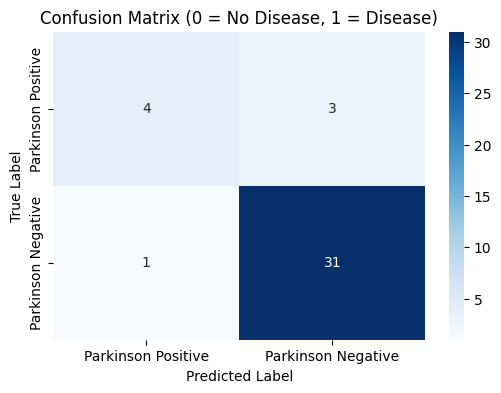

In [11]:
#Confusion matrix
cm = confusion_matrix(y_test, predict)

labels = ['Parkinson Positive', 'Parkinson Negative']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (0 = No Disease, 1 = Disease)')
plt.show()

In [19]:
#let's get feature importance
# Convert back to DataFrame
X_train_df = pd.DataFrame(X_train, columns=feature.columns)

# Fit the model
model.fit(X_train_df, y_train)

# Get feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_train_df.columns)
feat_importances = feat_importances.sort_values(ascending=False)

print(feat_importances)

PPE                 0.141948
MDVP:Fo(Hz)         0.103600
spread1             0.100603
MDVP:Flo(Hz)        0.079445
Jitter:DDP          0.062098
MDVP:Fhi(Hz)        0.053584
spread2             0.048673
NHR                 0.039578
MDVP:Jitter(Abs)    0.038244
MDVP:RAP            0.036337
Shimmer:DDA         0.033662
Shimmer:APQ5        0.030844
D2                  0.030661
MDVP:APQ            0.027757
MDVP:Shimmer        0.026224
DFA                 0.023533
RPDE                0.023532
HNR                 0.023365
MDVP:PPQ            0.023031
MDVP:Jitter(%)      0.021796
MDVP:Shimmer(dB)    0.018626
Shimmer:APQ3        0.012858
dtype: float64


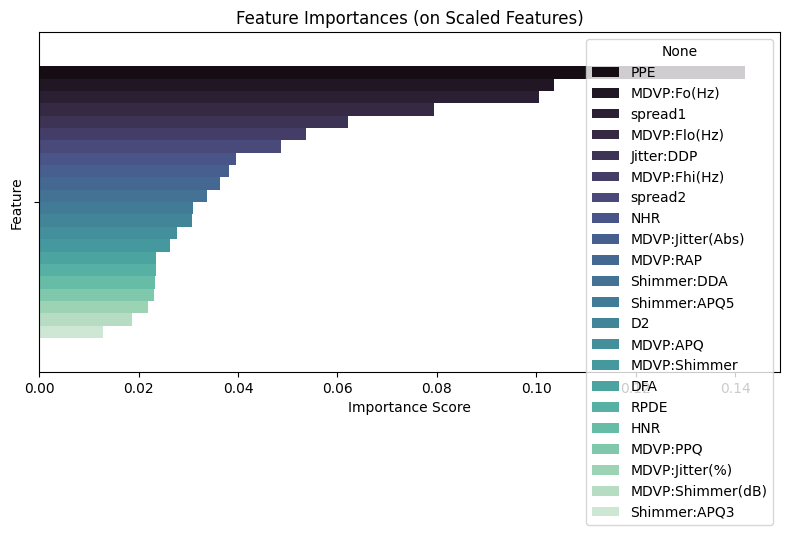

In [23]:
#Plot feature importance

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_importances, hue=feat_importances.index, palette='mako')
plt.title("Feature Importances (on Scaled Features)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()